In [1]:
import numpy as np
from Parallel_suite2p import ImageProcessor

searching the metadata info of the first tif
 found dimentions of: w_px [620 620 620] , h_px [1550 1550 1550]
found 1 planes and 3 independent ROIs
Concatenating ROIs to verify image reconstruction: 


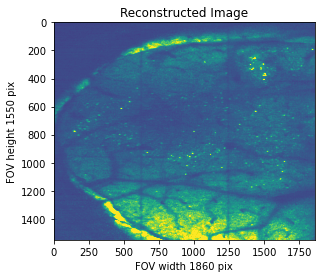

C:\Users\mora\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Directory already exists
found tif folder with 100 total tifs
concatenated data from all tiffs, total size: (847, 4750, 620)
data reshaped as (283, 1550, 620)
C:\Users\mora\Desktop\Github_code\ClosedLoopPackage\path_to_output\MROI_0
Directory already exists
saving cropped mov of shape (283, 1550, 620)
data reshaped as (282, 1550, 620)
C:\Users\mora\Desktop\Github_code\ClosedLoopPackage\path_to_output\MROI_1
Directory already exists
saving cropped mov of shape (282, 1550, 620)
data reshaped as (282, 1550, 620)
C:\Users\mora\Desktop\Github_code\ClosedLoopPackage\path_to_output\MROI_2
Directory already exists
saving cropped mov of shape (282, 1550, 620)
All saved, took 6.99 seconds


In [6]:
# Example Usage
tiff_folder_list = [r'C:\Users\mora\Desktop\testerTifs//']
exp_list = ['oriB']
x_start =0
x_end = 10000# a very large value
y_start = 0 # 
y_end = 10000 # a very large value 
out_path = r'C:\Users\mora\Desktop\Github_code\ClosedLoopPackage\path_to_output'
channels = 2 # (red/green)
singleChannel = 1 # take either both red/green channels or just one
channelOI= 0 # if singleChannel == True, select channel of interest: 0=Green, 1=Red
suite2pOpsFile ='opsMeso.npy' # Filename of the ops file
ops =np.load(suite2pOpsFile,allow_pickle=True).item()
# Initialize the class:
processor = ImageProcessor(tiff_folder_list, exp_list, (y_start, y_end), (x_start, x_end), out_path, channels, channelOI,singleChannel)
# Get metadata from the first tiff:
metadata = processor.get_metadata_info()
# Plot reconstructed image (OPTIONAL):
processor.plotReconstruction() # plot horizontally concatenated mROIs, this assumes they're the same size! you can skip it
# Repopulate some ops params using the metadata info:
ops['fs'] = np.float(metadata['fs'])
ops['nplanes'] = metadata['nplanes']
# save h5 files for each mROI:
processor.save_h5s()
# run suite2p on each saved h5 in parallel
jobs = processor.run_parallel_processing(ops)

In [3]:
# jobs = processor.run_parallel_processing(ops)

sending parallel processor number 0
Will be processing this data : {'h5py': 'C:\\Users\\mora\\Desktop\\Github_code\\ClosedLoopPackage\\path_to_output\\MROI_0//', 'h5py_key': ['data'], 'look_one_level_down': True, 'save_path0': 'C:\\Users\\mora\\Desktop\\Github_code\\ClosedLoopPackage\\path_to_output\\MROI_0//', 'data_path': [], 'subfolders': [], 'fast_disk': []}
sending parallel processor number 1
Will be processing this data : {'h5py': 'C:\\Users\\mora\\Desktop\\Github_code\\ClosedLoopPackage\\path_to_output\\MROI_1//', 'h5py_key': ['data'], 'look_one_level_down': True, 'save_path0': 'C:\\Users\\mora\\Desktop\\Github_code\\ClosedLoopPackage\\path_to_output\\MROI_1//', 'data_path': [], 'subfolders': [], 'fast_disk': []}
sending parallel processor number 2
Will be processing this data : {'h5py': 'C:\\Users\\mora\\Desktop\\Github_code\\ClosedLoopPackage\\path_to_output\\MROI_2//', 'h5py_key': ['data'], 'look_one_level_down': True, 'save_path0': 'C:\\Users\\mora\\Desktop\\Github_code\\Clo

In [ ]:
from glob import glob
base = r'C:\Users\mora\Desktop\Github_code\ClosedLoopPackage\path_to_output\MROI_'
h5pahts= [glob(base + str(i) + '//*.h5')[0] for i in range(metadata['nrois'])]

In [ ]:
import h5py
file = h5py.File(h5pahts[0], 'r')
thisdata = file.get('data')
print(thisdata.shape)

plt.imshow(np.mean(thisdata,0),vmax=10)


In [ ]:
thisdata.shape
file.close()

In [ ]:
import matplotlib.pyplot as plt
im=np.mean(data,0)
plt.imshow(im,vmin=-15,vmax=5)

In [ ]:
from glob import glob
glob(r'C:\Users\mora\Desktop\testerTifs//*.tif')[0]

In [ ]:

def load_tif_tester(mov_path):
    with ScanImageTiffReader(mov_path) as reader:
        data = reader.data()
    return data

data =load_tif_tester(glob(r'C:\Users\mora\Desktop\testerTifs//*.tif')[0])

In [ ]:
data.shape
#metadata['h_px'][0]*metadata['nrois']

In [ ]:
metadata

In [ ]:
283/5

In [ ]:
opsMeso = {'look_one_level_down': 0.0,
 'fast_disk': [],
 'delete_bin': True,
 'mesoscan': False,
 'bruker': False,
 'h5py': [],
 'h5py_key': 'data',
 'save_path0': [],
 'save_folder': [],
 'subfolders': [],
 'move_bin': False,
 'nplanes': 1,
 'nchannels': 1,
 'functional_chan': 1,
 'tau': 1.5,
 'fs':  np.float(metadata['fs'])/ metadata['nplanes'],
 'force_sktiff': False,
 'frames_include': -1,
 'multiplane_parallel': False,
 'preclassify': 0.0,
 'save_mat': True,
 'save_NWB': False,
 'combined': 1.0,
 'aspect': 2.0,
 'do_bidiphase': True,
 'bidiphase': 0,
#  'bidi_corrected': False,
 'do_registration': 1,
 'two_step_registration': False,
 'keep_movie_raw': False, # if two_step_registration = 1 this has to also be true.
 'nimg_init': 1000,
 'batch_size': 2000,
 'maxregshift': 0.1,
 'align_by_chan': 1,
 'reg_tif': False,
 'reg_tif_chan2': False,
 'subpixel': 10,
 'smooth_sigma_time': 1.0, # default 0
 'smooth_sigma': 1.15, # pixels, default 1.15
 'th_badframes': 1.0,
 'pad_fft': False,
 'nonrigid': False,
 'block_size': [128, 128],
 'snr_thresh': 1.2,
 'maxregshiftNR': 5.0,
 '1Preg': False,
 'spatial_hp': 25,
 'spatial_hp_reg': 26.0,
 'spatial_hp_detect': 25,
 'pre_smooth': 0,
 'spatial_taper': 50.0,
 'roidetect': True,
 'spikedetect': True,
 'sparse_mode': False,
 'diameter': 9,
 'spatial_scale': 1, # default 0, if set to 0, then the algorithm determines it automatically (recommend this on the first try)
 'connected': True,
 'nbinned': 5000, # maximum number of binned frames to use for ROI detection
 'max_iterations': 100, # default 20. how many iterations over which to extract cells - at most ops[‘max_iterations’], 
                        #but usually stops before due to ops[‘threshold_scaling’] criterion
 'threshold_scaling': 1.0, # default: 5.0. this controls the threshold at which to detect ROIs.. if you set this higher, then fewer ROIs will be detected
 'max_overlap': 0.5, # default: 0.75
 'high_pass': 100, #  default: 100. time window size
 'inner_neuropil_radius': 2, # default: 2. number of pixels to keep between ROI and neuropil donut
 'min_neuropil_pixels': 350, #default: 350. minimum number of pixels used to compute neuropil for each cell
 'allow_overlap': False, #default: False. whether or not to extract signals from pixels which belong to two ROIs.
 'chan2_thres': 0.65,
 'baseline': 'maximin',
 'win_baseline': 60.0,
 'sig_baseline': 10.0,
 'prctile_baseline': 8.0,
 'neucoeff': 0.7}



In [ ]:
np.save('opsMeso.npy',opsMeso, allow_pickle=True)
np.load('opsMeso.npy',allow_pickle=True)

In [ ]:
start_time = time.time()
data = [self.load_tif_meso(str(mov)) for mov in self.movs]
numtimepointstiffile = [d.shape[0] for d in data]
data = np.concatenate(data)
print('concatenated data from all tiffs, total size: ' + str(data.shape))

t_slice = slice(0, data.shape[0], self.planes)
ylen = np.shape(self.meso_params['lines'])[1]
xlen = np.shape(self.meso_params['lines'])[0] * self.meso_params['dx'][1]
xbounds = list(self.meso_params['dx'].copy())
xbounds.append(xlen)
print(xbounds)
datars = np.zeros((data.shape[0], ylen, xlen), dtype=np.int16)
Nstripes = np.shape(self.meso_params['lines'])[0]


for istrip in range(Nstripes):
    t_strip = slice(istrip, data.shape[0], Nstripes)
    x_strip = slice(xbounds[istrip], xbounds[istrip + 1],1)
    y_strip = slice(0, ylen)
    datars=data[t_strip,x_strip , y_strip].copy()
    print(f'data reshaped as {datars.shape}')
    thisoutdir = os.path.join(self.out_path, f'MROI_{istrip}')
    self.outdirs.append(thisoutdir)
    print(thisoutdir)
    self.create_directory(thisoutdir)
    outname = os.path.join(thisoutdir, f'{exp_name}_cropped_mov.h5')
    with h5py.File(outname, 'w') as hf:
        cropped_mov_plane = datars
        print(f'saving cropped mov of shape {cropped_mov_plane.shape}')
        hf.create_dataset('data', data=cropped_mov_plane, dtype='uint16')
    del cropped_mov_plane
    gc.collect()

elapsed_time = time.time() - start_time
print(f'All saved, took {elapsed_time:.2f} seconds')

In [ ]:
im.shape[0]/3